# Rotate points

We define a helper function to plot the points on a globe.

In [1]:
def plot_globe(*data, title="", lat_0=-45,lon_0=-40):
    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt
    import numpy as np

    map = Basemap(projection='ortho',lat_0=lat_0,lon_0=lon_0,resolution='c')
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color=(0.93,0.93,0.93),lake_color=(0.93,0.93,0.93))
    map.drawmeridians(np.arange(0,360,10), color="gray")
    map.drawparallels(np.arange(-90,90,10), color="gray")

    for d in data:
        x, y = d[1], d[0]
        c = None if len(d) < 3 else d[2]
        m = "o" if len(d) < 4 else d[3]
        if c is None:
            c = np.arange(len(x))
        map.scatter(x, y, c=c, marker=m, latlon=True)
    plt.title(title)
    plt.show()

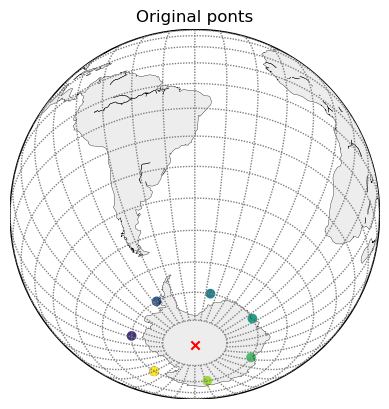

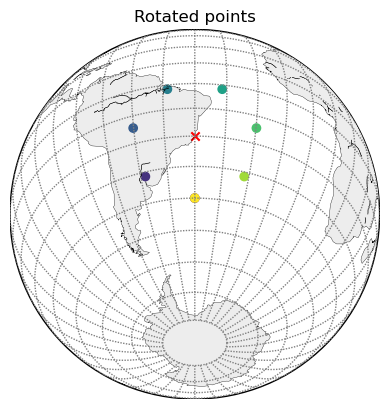

In [2]:
import numpy as np
from earthkit.geo.rotate import rotate

# new position of the south pole, this defines the rotation
south_pole = [-20, -40]

# list of points on the lat=-70 latitude
lat = np.array([-70]*8)
lon = np.linspace(-180, 180, 8)

# perform rotation
lat_r, lon_r = rotate(lat, lon, south_pole[0], south_pole[1])

# plot the points, red cross marks the south pole
plot_globe([lat, lon], [-90, 0, "r", "x"], title="Original ponts")
plot_globe([lat_r, lon_r], [-20, -40, "r", "x"], title="Rotated points")

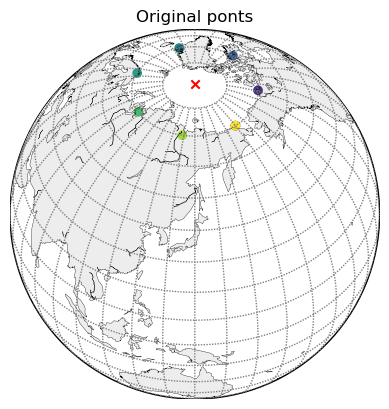

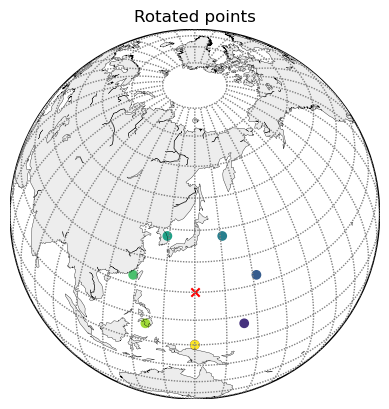

In [3]:
# list of points on the lat=70 latitude
lat = np.array([70]*8)
lon = np.linspace(-180, 180, 8)

# perform rotation
lat_r, lon_r = rotate(lat, lon, south_pole[0], south_pole[1])

# plot the points, red cross marks the north pole
plot_globe([lat, lon], [90, 0, "r", "x"], title="Original ponts", lat_0=45, lon_0=140)
plot_globe([lat_r, lon_r], [20, 140, "r", "x"], title="Rotated points", lat_0=45, lon_0=140)